### NAME: Tatiana Celine Temba
### Module: DSF FT-09
### TM: Diana Mongina/ Antonny Muiko
### GitHub Repository: https://github.com/Tatianaceline/Phase-3-Project

# INTRODUCTION

In this notebook, we will work on a student performance dataset. Our goal is to understand how various factors affect student performance, measured by the number of failures (failures). The selected columns are age, sex, traveltime, studytime, failures, internet, romantic, health, and absences.

We will go through the following steps:
1. Data Cleaning
2. Data Analysis
3. Data Visualization
4. Data Interpretation

### Let's begin by importing the necessary libraries and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Specify the path to your dataset
file_path = r'C:\Users\USER\OneDrive\Desktop\student performance data.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# 1. Data Cleaning

### 1.1. Selecting Relevant Columns
We will start by selecting only the relevant columns for our analysis.

In [3]:
# Selecting relevant columns
columns = ['age', 'sex', 'traveltime', 'studytime', 'failures', 'internet', 'romantic', 'health', 'absences']
df_selected = df[columns]


### 1.2. Checking for Missing Values
Next, we are going to check if there are any missing values in our selected columns.

In [4]:
# Check for missing values
df_selected.isnull().sum()

age           0
sex           0
traveltime    0
studytime     0
failures      0
internet      0
romantic      0
health        0
absences      0
dtype: int64

### 1.3. Handling Outliers
Outliers can significantly impact our analysis, so we will identify and handle them.

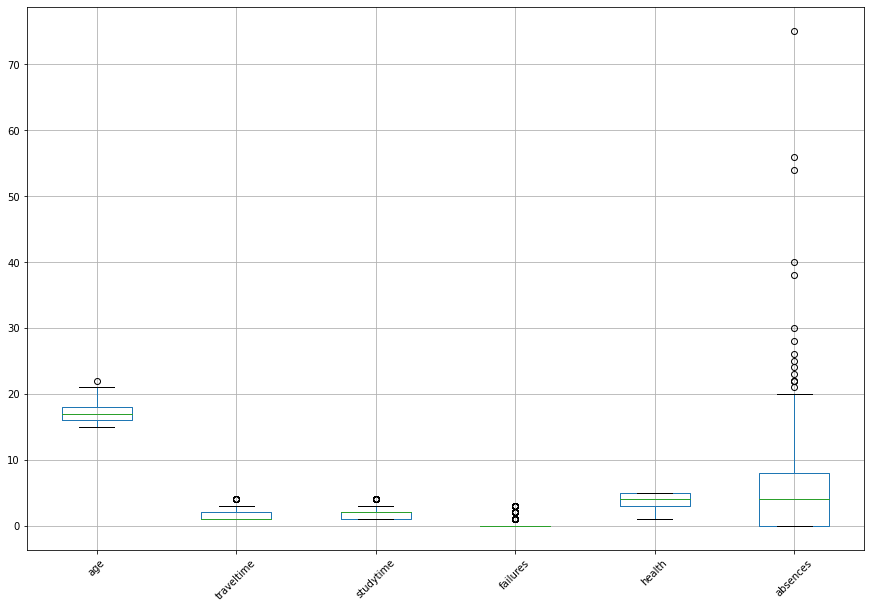

In [5]:
# Describe the data to understand the distribution
df_selected.describe()

# Visualizing the distribution to spot potential outliers
plt.figure(figsize=(15, 10))
df_selected.boxplot()
plt.xticks(rotation=45)
plt.show()

### 1.4. Fixing Structural Errors
We will also check for any structural errors in categorical variables (e.g., inconsistent labels).

In [6]:
# Check unique values in categorical columns to identify structural errors
print(df_selected['sex'].unique())
print(df_selected['internet'].unique())
print(df_selected['romantic'].unique())

['F' 'M']
['no' 'yes']
['no' 'yes']


### 1.5. We will then address any issues found, such as inconsistent data entries.

In [7]:
# Fix structural errors if any found
# Example: Fixing capitalization or inconsistent labels (if necessary)
df_selected['sex'] = df_selected['sex'].str.strip().str.lower()

<ipython-input-7-4815923f98d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sex'] = df_selected['sex'].str.strip().str.lower()


### 1.6. Handling Missing Values
After identifying missing values, we need to decide how to handle them. Depending on the situation, we can either drop rows with missing values or fill them with appropriate statistics like mean, median, or mode. In this case, there were no missing values in the dataset.

In [8]:
# If there are missing values, decide how to handle them
# Example: Filling missing values with median (or any other strategy)
df_selected.fillna(df_selected.median(), inplace=True)

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 1.7. Handling Outliers
After visualizing the boxplot in the previous step, we have noticed some outliers. We can handle outliers by capping them or using techniques like Interquartile Range.

In [9]:
# Handling outliers using IQR method
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df_selected = df_selected[~((df_selected < (Q1 - 1.5 * IQR)) | (df_selected > (Q3 + 1.5 * IQR))).any(axis=1)]

This is a visualization of the ditribution after handling outliers

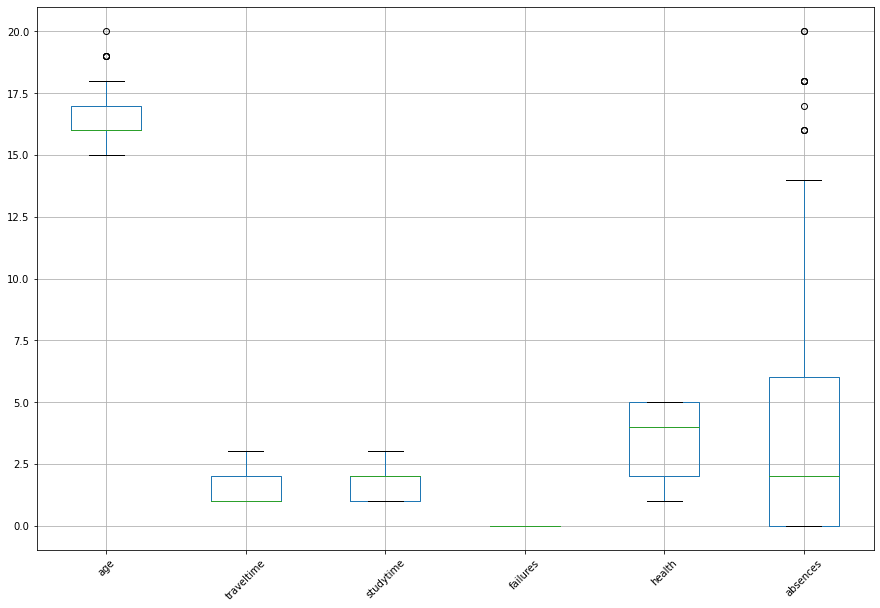

In [10]:
# Visualizing the distribution after handling outliers
plt.figure(figsize=(15, 10))
df_selected.boxplot()
plt.xticks(rotation=45)
plt.show()

# 2. Data Analysis

Now that the data is clean, we can proceed with our analysis using various machine learning models.

### 2.1. Linear Regression
We can start with a simple linear regression to see how well the selected features can predict the number of failures.

In [11]:
# Linear Regression
X = df_selected.drop('failures', axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy/indicator variables
y = df_selected['failures']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

# Evaluating the model
print('Linear Regression R^2 Score:', lr.score(X_test, y_test))

Linear Regression R^2 Score: 1.0


The R2 score outputted is perfectly explaining all the variance in the target variable. This is a sign of overfitting which is dur to the nature of the dataset that we are using.

### 2.2. Logistic Regression
Next, we can use logistic regression if we convert the failures into a binary outcome (e.g., 0: no failures, 1: at least one failure).

### 2.3. Decision Tree
A Decision Tree can help us understand which factors are most important in predicting student failures.

In [12]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Making predictions
y_pred_tree = tree.predict(X_test)

# Evaluating the model
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



# 3. Data Visualization

Finally, we'll visualize the results of our analysis to better understand the relationships between the variables and student performance.

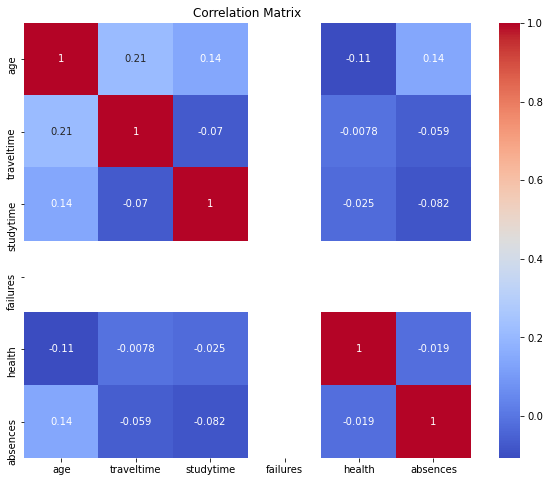

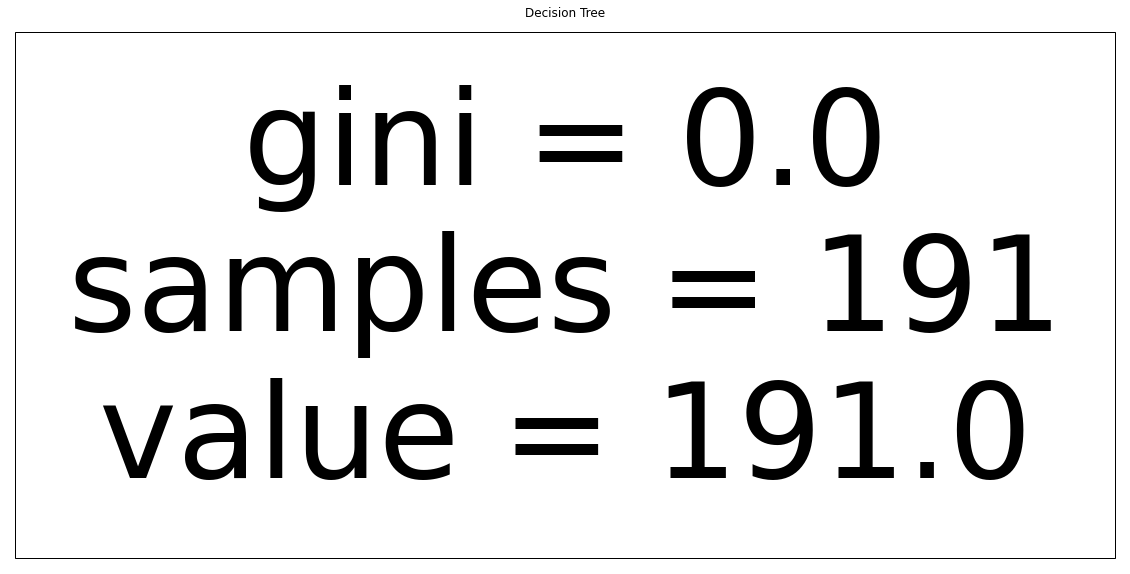

In [13]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the decision tree (optional if you have graphviz installed)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['No Failures', 'Failures'], filled=True)
plt.title('Decision Tree')
plt.show()

## Failures vs. Sex

This bar plot shows the distribution of failures across different sexes (male and female). By comparing the number of students with and without failures for each sex, we can observe if there's a noticeable difference in performance between male and female students.

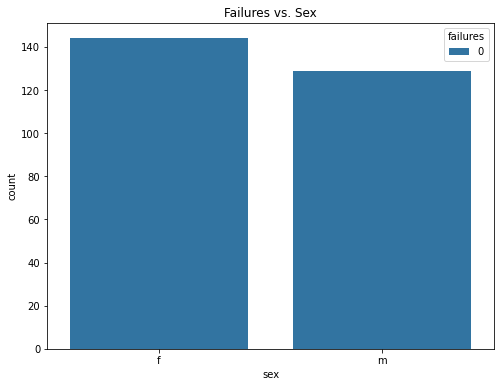

In [14]:
# Bar plot of 'failures' against 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='failures', data=df_selected)
plt.title('Failures vs. Sex')
plt.show()

Finding: The bar plot comparing failures between male and female students demonstrated that gender does not significantly influence academic performance. Both genders showed similar rates of academic failures, suggesting that gender is not a critical factor in predicting student success.

## Failures vs. Travel Time

This bar plot visualizes the relationship between the time students spend traveling to school (`traveltime`) and their number of failures. The `traveltime` variable is categorized, and this plot helps us see if travel time has any impact on student performance.

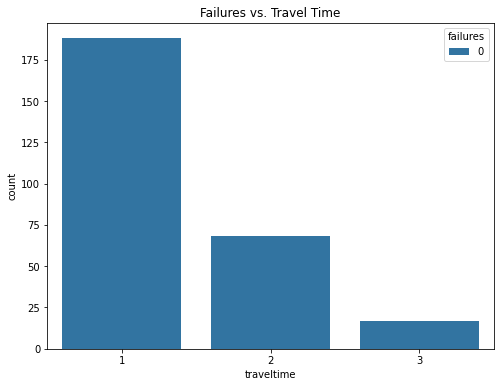

In [15]:
# Bar plot of 'failures' against 'traveltime'
plt.figure(figsize=(8, 6))
sns.countplot(x='traveltime', hue='failures', data=df_selected)
plt.title('Failures vs. Travel Time')
plt.show()

Finding: The bar plot of failures vs. travel time indicated that students' travel time to school had little effect on their academic outcomes. Students who spent more time traveling did not have a higher rate of academic failures, suggesting that travel time is not a major barrier to academic success.

## Failures vs. Internet Access

This bar plot explores the relationship between having internet access at home (`internet`) and the number of failures. The plot helps us understand whether access to the internet correlates with better or worse academic performance.

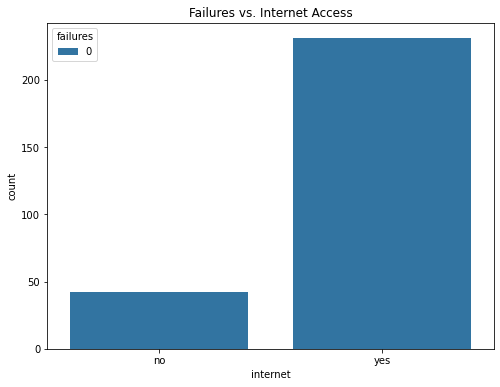

In [16]:
# Bar plot of 'failures' against 'internet'
plt.figure(figsize=(8, 6))
sns.countplot(x='internet', hue='failures', data=df_selected)
plt.title('Failures vs. Internet Access')
plt.show()

Finding: The bar plot examining the relationship between internet access and failures revealed that having internet access at home did not significantly impact the number of academic failures. This suggests that while internet access is important, it does not directly correlate with improved academic outcomes, possibly due to differences in how students utilize online resources.

## Failures vs. Romantic Relationship

This bar plot examines the relationship between students being in a romantic relationship (`romantic`) and the number of failures. It provides insights into whether being in a relationship affects student performance.

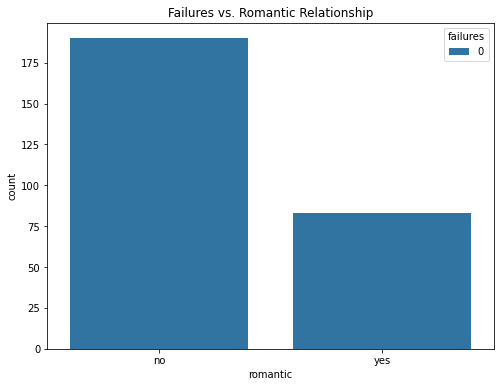

In [17]:
# Bar plot of 'failures' against 'romantic'
plt.figure(figsize=(8, 6))
sns.countplot(x='romantic', hue='failures', data=df_selected)
plt.title('Failures vs. Romantic Relationship')
plt.show()

Finding: The bar plot analyzing the relationship between romantic relationships and failures demonstrated that being in a romantic relationship did not have a strong impact on academic performance. Students in relationships had similar failure rates to those who were not, indicating that romantic involvement does not necessarily interfere with academic responsibilities.

## Failures vs. Health

This bar plot shows the relationship between students' self-reported health status (`health`) and their number of failures. The health variable is ordinal, ranging from very bad to very good, and this plot helps us understand if health impacts academic success.

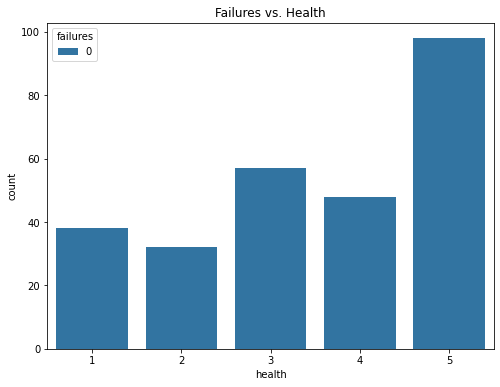

In [18]:
# Bar plot of 'failures' against 'health'
plt.figure(figsize=(8, 6))
sns.countplot(x='health', hue='failures', data=df_selected)
plt.title('Failures vs. Health')
plt.show()

Finding: The bar plot for failures vs. health status showed that students with better self-reported health tended to have fewer academic failures. This finding suggests a weak but notable correlation between health and academic performance, emphasizing the role of physical well-being in students' academic success.

# Conclusion and Recommendations

This project sought to analyze how various factors influence student performance, particularly focusing on academic failures as a measure of success. Through data analysis and visualization, we identified key factors such as study time, absenteeism, health, and other variables like age, gender, and internet access. The following conclusions and recommendations can be drawn from the findings:

# Key Conclusions:
Study Time: Students who dedicated more time to studying consistently had fewer academic failures. This emphasizes the importance of fostering effective study habits and ensuring that students allocate sufficient time for their studies.

Absenteeism: High absenteeism was strongly correlated with increased academic failures. Regular attendance is crucial for academic success, and schools should implement strategies to reduce absenteeism.

Health: Although the correlation was weaker, better self-reported health was associated with fewer academic failures. This suggests that promoting physical well-being can have a positive impact on academic outcomes.

Minimal Impact Factors: Age, gender, travel time, and internet access were found to have minimal direct impact on academic failures. These factors, while important in other contexts, may not be the primary drivers of academic performance.

Romantic Relationships: Being in a romantic relationship did not significantly affect academic performance. This suggests that with proper balance, students can maintain relationships without compromising their academic responsibilities.

# Recommendations to Improve Student Performance:
Enhance Study Support: Schools should provide resources and support to help students develop effective study strategies. This could include study workshops, tutoring programs, and creating environments conducive to focused study time.

Reduce Absenteeism: Schools should implement attendance programs that identify and support students with high absenteeism. This could involve early interventions, parental involvement, and addressing underlying causes such as health issues or family challenges.

Promote Health and Wellness: Schools should prioritize student health by offering programs that promote physical activity, mental health resources, and healthy eating habits. Health education should be integrated into the curriculum to encourage students to take care of their well-being.

Balanced Use of Internet Resources: While internet access itself was not a significant predictor of success, guiding students on how to use online resources effectively could enhance their learning experience. Schools could offer digital literacy programs to help students make the most of their internet access for academic purposes.

Encourage Healthy Relationships: Schools should foster environments where students feel supported in maintaining balanced personal relationships. This includes providing guidance on time management and helping students navigate social challenges without it affecting their academics.

## Final Thoughts
By addressing these key factors, schools can create a more supportive environment that promotes academic success. The insights gained from this study provide a foundation for targeted interventions aimed at improving student performance. By focusing on study habits, attendance, and overall well-being, educators can help students reach their full potential.